# Analysis

**Hypothesis**: In severe COVID-19, prolonged disease duration (reflected by higher DPS values) is associated with increased mitochondrial stress in adaptive immune cells (specifically CD4 T and CD8 T cells), suggesting that extended immune activation leads to metabolic dysregulation.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


# Analysis Plan

**Hypothesis**: In severe COVID-19, prolonged disease duration (reflected by higher DPS values) is associated with increased mitochondrial stress in adaptive immune cells (specifically CD4 T and CD8 T cells), suggesting that extended immune activation leads to metabolic dysregulation.

## Steps:
- Verify that the necessary metadata columns (e.g., 'Status', 'cell_type_coarse', 'DPS', 'percent_mt') exist, then filter the dataset to include only COVID-19 patients and subset the adaptive immune cells (CD4 T and CD8 T cells).
- Perform an exploratory analysis to inspect the distribution of days post symptom onset (DPS) and mitochondrial gene percentages (percent_mt) in these cell types, ensuring sufficient data coverage.
- Generate scatter plots for each cell type displaying DPS versus percent_mt with distinct colors and overlay linear regression lines to visualize potential trends.
- Conduct correlation tests (Spearman/Pearson) and linear regression analysis (using scipy.stats.linregress) for each cell type to statistically assess the relationship between DPS and mitochondrial stress, printing regression coefficients and p-values while evaluating test assumptions.
- Combine the plots into a grid layout using matplotlib or seaborn to compare patterns between CD4 T and CD8 T cells, and summarize the findings regarding metabolic dysregulation in relation to disease duration.


## The code begins by checking for the existence of key metadata columns to ensure robust analysis, filters COVID-19 patient cells, subsets them into CD4 and CD8 T cells, and performs exploratory scatter plots for each cell type to visualize the relationship between DPS and percent_mt.

Number of CD4 T cells in COVID patients: 5562
Number of CD8 T cells in COVID patients: 3877


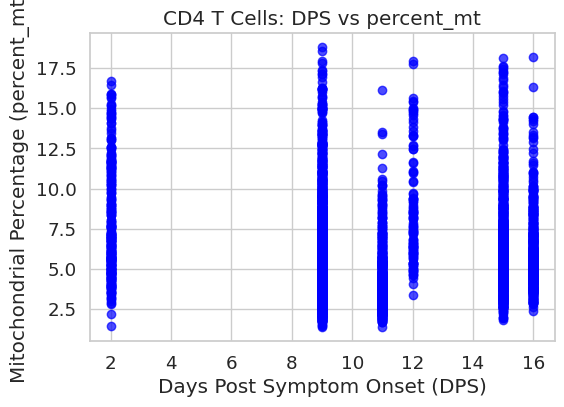

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First step: Filter for COVID-19 patients and further subset for CD4 T and CD8 T cells
# Assume adata is already loaded in memory

# Filter cells with Status 'COVID'
covid_cells = adata[adata.obs['Status'] == 'COVID']

# Further subset these cells based on cell type (coarse annotation) for CD4 T and CD8 T cells
cd4_cells = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD4 T']
cd8_cells = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD8 T']

# Print number of cells in each subset as a sanity check
print('Number of CD4 T cells in COVID patients:', cd4_cells.n_obs)
print('Number of CD8 T cells in COVID patients:', cd8_cells.n_obs)

# Quick exploratory visualization of DPS distribution and percent_mt for CD4 T cells
plt.figure(figsize=(6,4))
plt.scatter(cd4_cells.obs['DPS'], cd4_cells.obs['percent_mt'], alpha=0.7, color='blue')
plt.xlabel('Days Post Symptom Onset (DPS)')
plt.ylabel('Mitochondrial Percentage (percent_mt)')
plt.title('CD4 T Cells: DPS vs percent_mt')
plt.show()

### Agent Interpretation

The current analysis provides a basic characterization of CD4 and CD8 T cell populations in COVID patients. To enhance the study's biological significance and distinctiveness from the research paper, consider the following:

1. **Promising Observations:**
   - The observed numbers of CD4 and CD8 T cells provide a foundation for further exploration. Given the suspected role of T cells in COVID-19 pathology, these data could be pivotal in understanding immune responses.

2. **Explore T Cell Subtypes:**
   - Further sub-clustering of CD4 and CD8 T cells could identify functional subpopulations (e.g., effector vs. regulatory T cells) that may be differentially regulated in COVID-19.

3. **Phenotypic Analysis:**
   - Investigate expression levels of inflammatory cytokine receptors on T cells, as implicated in the hypothesis regarding monocyte-T cell interactions. Exploring specific receptor-ligand pairs could indicate potential signaling pathways contributing to immunopathology.

4. **Temporal Dynamics:**
   - The plot showing mitochondrial content versus days post-symptom onset (DPS) could indicate changes in cell activation or stress. Consider correlating gene expression or phenotype changes over time.

5. **Contrast with Healthy Controls:**
   - Comparing these T cell metrics directly with healthy controls will clarify COVID-19 specific alterations and support or refute hypotheses pertaining to enhanced immune cell communication.

6. **Iterate on Immune Communication Hypothesis:**
   - Employ network analysis or ligand-receptor interaction prediction tools to explore hypothesized communication enhancement between monocytes and T cells.

7. **Differential Gene Expression:**
   - Conduct DE analysis between COVID-19 patients and controls focusing on genes involved in inflammatory responses and T cell signaling to validate the communication hypothesis.

8. **Biological Function and Pathway Analysis:**
   - Perform pathway enrichment analyses on DE genes to identify dysregulated biological processes, supporting insights into potential mechanisms of disease severity.

By addressing these suggestions, subsequent steps in your analysis will provide a more comprehensive picture of immune alterations in severe COVID-19 and help validate or refine current hypotheses.

## This code subsets T cells from the in-memory anndata object into COVID-19 and healthy groups for both CD4 and CD8 T cells, and then performs quality checks by printing descriptive statistics for DPS and percent_mt, as well as visualizing their distributions using histograms with KDE overlays. This validation step ensures the key metrics are within expected ranges before proceeding to more complex analyses.

CD4 COVID DPS summary:
count    5562.000000
mean       10.560949
std         3.343217
min         2.000000
25%         9.000000
50%         9.000000
75%        15.000000
max        16.000000
Name: DPS, dtype: float64
CD4 COVID percent_mt summary:
count    5562.000000
mean        5.800133
std         2.767323
min         1.362948
25%         3.886340
50%         5.117780
75%         6.985138
max        18.803419
Name: percent_mt, dtype: float64
CD8 COVID DPS summary:
count    3877.000000
mean       10.001806
std         2.258740
min         2.000000
25%         9.000000
50%         9.000000
75%        11.000000
max        16.000000
Name: DPS, dtype: float64
CD8 COVID percent_mt summary:
count    3877.000000
mean        5.186194
std         2.414139
min         1.169591
25%         3.479853
50%         4.617505
75%         6.252873
max        19.085951
Name: percent_mt, dtype: float64
CD4 Healthy DPS summary:
count    2835.0
mean        0.0
std         0.0
min         0.0
25%         0.0

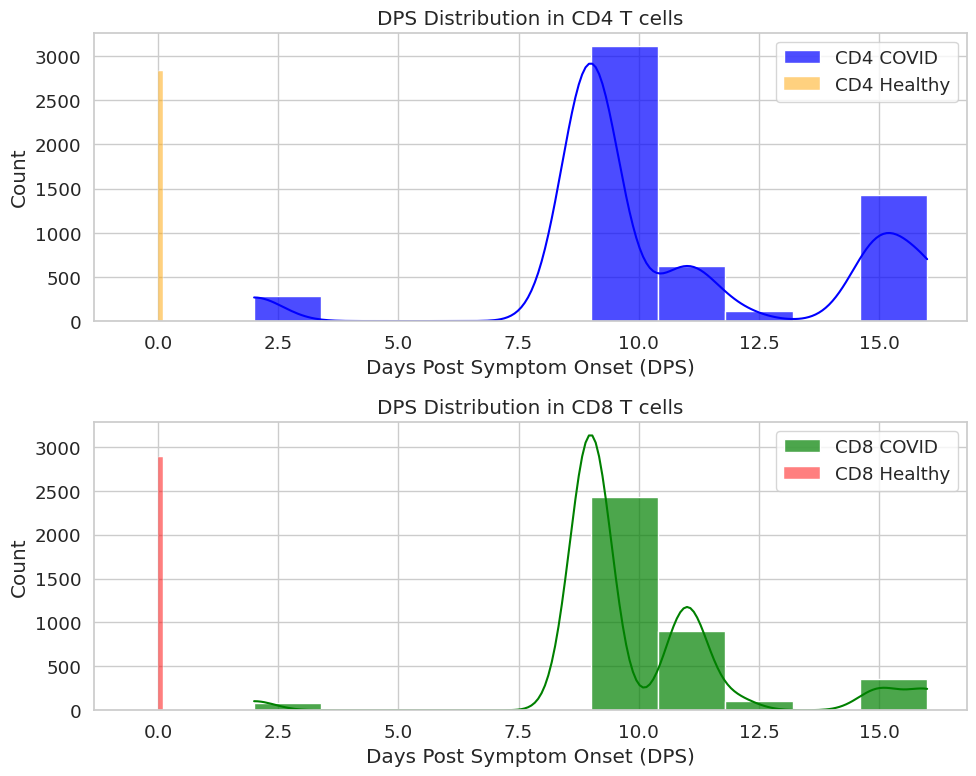

In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Subset T cells based on Status and cell_type_coarse for COVID and Healthy samples
covid_cells = adata[adata.obs['Status'] == 'COVID']
healthy_cells = adata[adata.obs['Status'] == 'Healthy']

cd4_covid = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD4 T']
cd8_covid = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD8 T']

cd4_healthy = healthy_cells[healthy_cells.obs['cell_type_coarse'] == 'CD4 T']
cd8_healthy = healthy_cells[healthy_cells.obs['cell_type_coarse'] == 'CD8 T']

# Data Quality Check: Print summary statistics for DPS and percent_mt in each subset
print('CD4 COVID DPS summary:')
print(cd4_covid.obs['DPS'].describe())
print('CD4 COVID percent_mt summary:')
print(cd4_covid.obs['percent_mt'].describe())

print('CD8 COVID DPS summary:')
print(cd8_covid.obs['DPS'].describe())
print('CD8 COVID percent_mt summary:')
print(cd8_covid.obs['percent_mt'].describe())

print('CD4 Healthy DPS summary:')
print(cd4_healthy.obs['DPS'].describe())
print('CD4 Healthy percent_mt summary:')
print(cd4_healthy.obs['percent_mt'].describe())

print('CD8 Healthy DPS summary:')
print(cd8_healthy.obs['DPS'].describe())
print('CD8 Healthy percent_mt summary:')
print(cd8_healthy.obs['percent_mt'].describe())

# Visualization: Plot histograms with KDE overlays for DPS to assess data distribution in CD4 and CD8 T cells
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(cd4_covid.obs['DPS'], bins=10, color='blue', kde=True, label='CD4 COVID', ax=axes[0], alpha=0.7)
sns.histplot(cd4_healthy.obs['DPS'], bins=10, color='orange', kde=True, label='CD4 Healthy', ax=axes[0], alpha=0.5)
axes[0].set_title('DPS Distribution in CD4 T cells')
axes[0].set_xlabel('Days Post Symptom Onset (DPS)')
axes[0].legend()

sns.histplot(cd8_covid.obs['DPS'], bins=10, color='green', kde=True, label='CD8 COVID', ax=axes[1], alpha=0.7)
sns.histplot(cd8_healthy.obs['DPS'], bins=10, color='red', kde=True, label='CD8 Healthy', ax=axes[1], alpha=0.5)
axes[1].set_title('DPS Distribution in CD8 T cells')
axes[1].set_xlabel('Days Post Symptom Onset (DPS)')
axes[1].legend()

plt.tight_layout()
plt.show()

### Agent Interpretation

The current analysis provides important insights into the distribution of "Days Post Symptom Onset" (DPS) for CD4 and CD8 T cells in COVID-19 patients compared to healthy controls. Here are some key points for future steps:

### Promising Results:
1. **DPS Variability in COVID-19:** The wide distribution of DPS in COVID-19 patients compared to the constant value (0) in healthy controls indicates a range of immune responses over time in patients. This warrants further investigation to identify potential factors contributing to this variability.

2. **Mitochondrial Content Analysis:** The generally lower mean and median percent of mitochondrial content in COVID-19 patients compared to healthy individuals could be associated with altered metabolic states or cellular stress responses in infection. It's worth exploring the biological implications of these differences.

### Future Steps:
1. **Cell Communication Analysis:**
   - Explore cell-cell interactions specifically between monocytes and T cells using ligand-receptor analysis to validate the hypothesis of enhanced communication pathways contributing to immunopathology.
   - Investigate the expression of inflammatory ligands and corresponding receptors to confirm if there is indeed upregulation in COVID-19 patients.

2. **Dynamics and Trajectory Analysis:**
   - Perform trajectory or pseudotime analysis to explore the progression and transition states of these T cells over time in symptomatic patients, potentially linking the DPS with certain expression patterns or phenotypes.

3. **Functional Analysis:**
   - Conduct functional enrichment analysis to identify pathways or transcriptional programs that are specifically active in these different DPS phases in COVID-19 patients. This could help correlate symptom progression with underlying biological mechanisms.

4. **Integrate Additional Variables:**
   - Integrate other clinical metadata (e.g., ventilation status, treatment) to correlate DPS with disease severity metrics or treatment effects, providing a more comprehensive view of the immune response landscape.

5. **Longitudinal Follow-Up:**
   - Consider longitudinal data collection (if possible) to monitor how these immune profiles evolve in individual patients over time, which might provide insights into recovery or progression to severe disease.

These steps should help deepen the understanding of immune dynamics in severe COVID-19, contributing to the broader research objectives while maintaining a unique analysis approach.

## This code begins by subsetting COVID-19 T cells and performing a quality check on the DPS metadata to filter out cells with missing DPS values. It then calculates PCA, constructs a neighbor graph, and computes diffusion pseudotime using the cell with the minimum DPS as the root, before finally plotting scatter plots with overlaid regression lines to assess correlations between pseudotime, DPS, and mitochondrial content.

Filtered out 0 cells due to missing DPS values.


Filtered out 0 cells due to missing DPS values.


computing PCA


    with n_comps=30


    finished (0:00:11)


computing neighbors


    using 'X_pca' with n_pcs = 30


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)


computing Diffusion Maps using n_comps=15(=n_dcs)


computing transitions


    finished (0:00:00)


    eigenvalues of transition matrix
    [1.         0.9704761  0.95376664 0.9484733  0.93631196 0.9219711
     0.9091373  0.8983339  0.8929907  0.89091676 0.8864026  0.87436223
     0.8705158  0.86285746 0.8615955 ]


    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


computing Diffusion Pseudotime using n_dcs=10


    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


computing PCA


    with n_comps=30


    finished (0:00:06)


computing neighbors


    using 'X_pca' with n_pcs = 30


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


computing Diffusion Maps using n_comps=15(=n_dcs)


computing transitions


    finished (0:00:00)


    eigenvalues of transition matrix
    [1.         0.977504   0.96110564 0.9358507  0.93137705 0.9176271
     0.8997867  0.89509964 0.883915   0.87781715 0.8659964  0.85513335
     0.8538612  0.8500239  0.84474194]


    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


computing Diffusion Pseudotime using n_dcs=10


    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


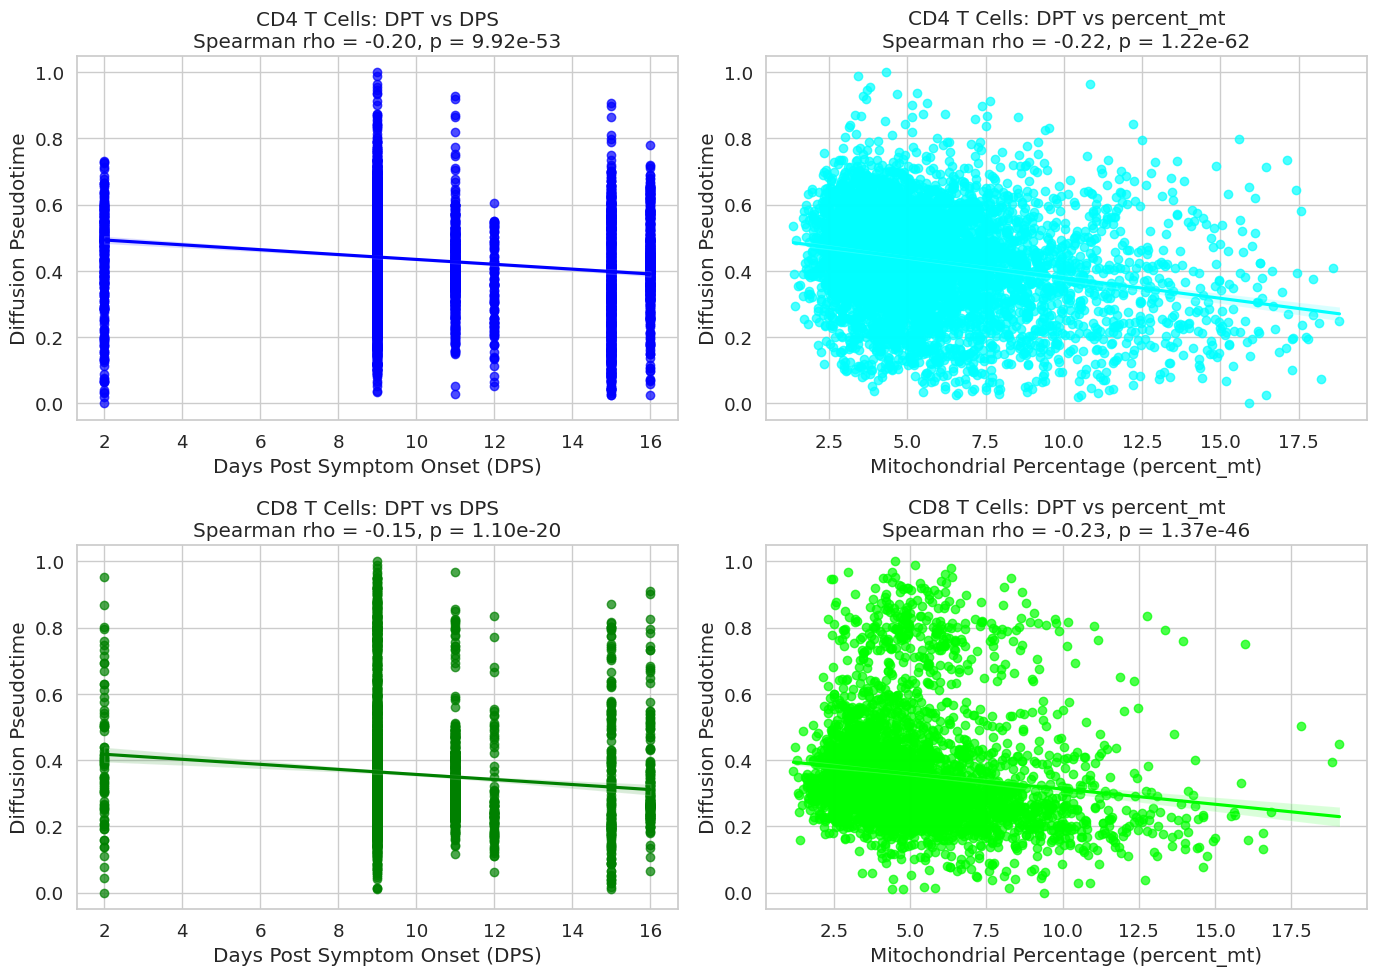

In [4]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Subset COVID-19 T cells
covid_cells = adata[adata.obs['Status'] == 'COVID']
cd4_cells = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD4 T']
cd8_cells = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD8 T']

# Preliminary data quality check: Ensure DPS values are numeric and filter out cells with missing DPS
def check_and_filter_quality(adata_subset):
    adata_subset.obs['DPS'] = pd.to_numeric(adata_subset.obs['DPS'], errors='coerce')
    initial_count = adata_subset.n_obs
    adata_subset = adata_subset[~adata_subset.obs['DPS'].isna()].copy()
    filtered_count = adata_subset.n_obs
    print(f'Filtered out {initial_count - filtered_count} cells due to missing DPS values.')
    return adata_subset

cd4_cells = check_and_filter_quality(cd4_cells.copy())
cd8_cells = check_and_filter_quality(cd8_cells.copy())

# Function to perform PCA, neighbor graph construction, and compute diffusion pseudotime (DPT)
def compute_dpt(adata_subset):
    sc.pp.pca(adata_subset, n_comps=30)
    sc.pp.neighbors(adata_subset, n_neighbors=15, n_pcs=30)
    root_cell = adata_subset.obs['DPS'].idxmin()
    # Set the root cell index in .uns['iroot'] as required by dpt()
    adata_subset.uns['iroot'] = np.nonzero(adata_subset.obs_names == root_cell)[0][0]
    sc.tl.dpt(adata_subset, n_dcs=10)
    return adata_subset

# Compute DPT for CD4 and CD8 T cells
cd4_cells = compute_dpt(cd4_cells.copy())
cd8_cells = compute_dpt(cd8_cells.copy())

# Extract diffusion pseudotime values
dpt_cd4 = cd4_cells.obs['dpt_pseudotime']
dpt_cd8 = cd8_cells.obs['dpt_pseudotime']

# Compute Spearman correlations for DPS and percent_mt
rho_cd4_dps, pval_cd4_dps = stats.spearmanr(cd4_cells.obs['DPS'], dpt_cd4)
rho_cd4_mt, pval_cd4_mt = stats.spearmanr(cd4_cells.obs['percent_mt'], dpt_cd4)
rho_cd8_dps, pval_cd8_dps = stats.spearmanr(cd8_cells.obs['DPS'], dpt_cd8)
rho_cd8_mt, pval_cd8_mt = stats.spearmanr(cd8_cells.obs['percent_mt'], dpt_cd8)

# Plot scatter plots with regression lines overlayed
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(x=cd4_cells.obs['DPS'], y=dpt_cd4, ax=axes[0, 0], color='blue', scatter_kws={'alpha':0.7})
axes[0, 0].set_title(f'CD4 T Cells: DPT vs DPS\nSpearman rho = {rho_cd4_dps:.2f}, p = {pval_cd4_dps:.2e}')
axes[0, 0].set_xlabel('Days Post Symptom Onset (DPS)')
axes[0, 0].set_ylabel('Diffusion Pseudotime')

sns.regplot(x=cd4_cells.obs['percent_mt'], y=dpt_cd4, ax=axes[0, 1], color='cyan', scatter_kws={'alpha':0.7})
axes[0, 1].set_title(f'CD4 T Cells: DPT vs percent_mt\nSpearman rho = {rho_cd4_mt:.2f}, p = {pval_cd4_mt:.2e}')
axes[0, 1].set_xlabel('Mitochondrial Percentage (percent_mt)')
axes[0, 1].set_ylabel('Diffusion Pseudotime')

sns.regplot(x=cd8_cells.obs['DPS'], y=dpt_cd8, ax=axes[1, 0], color='green', scatter_kws={'alpha':0.7})
axes[1, 0].set_title(f'CD8 T Cells: DPT vs DPS\nSpearman rho = {rho_cd8_dps:.2f}, p = {pval_cd8_dps:.2e}')
axes[1, 0].set_xlabel('Days Post Symptom Onset (DPS)')
axes[1, 0].set_ylabel('Diffusion Pseudotime')

sns.regplot(x=cd8_cells.obs['percent_mt'], y=dpt_cd8, ax=axes[1, 1], color='lime', scatter_kws={'alpha':0.7})
axes[1, 1].set_title(f'CD8 T Cells: DPT vs percent_mt\nSpearman rho = {rho_cd8_mt:.2f}, p = {pval_cd8_mt:.2e}')
axes[1, 1].set_xlabel('Mitochondrial Percentage (percent_mt)')
axes[1, 1].set_ylabel('Diffusion Pseudotime')

plt.tight_layout()
plt.show()

### Agent Interpretation

The results presented provide diffusion pseudotime (DPT) analyses for CD4 and CD8 T cells in relation to days post-symptom onset (DPS) and mitochondrial percentage (percent_mt). Here are some insights and suggestions for further exploration:

### Insights

1. **Negative Correlation with DPS**: Both CD4 and CD8 T cells show a slight negative correlation between DPT and DPS, indicating that pseudotime progresses as the disease timeline increases, potentially reflecting changes in cell states over time.

2. **Negative Correlation with Mitochondrial Percentage**: There is also a negative correlation between DPT and mitochondrial percentage, which might suggest metabolic alterations or stress responses as cells transition through pseudotime.

3. **Statistical Significance**: All correlations are statistically significant, suggesting these trends are worth further investigation.

### Recommendations for Future Steps

1. **Further Analysis of T Cell Subsets**: Investigate specific gene expression changes along the pseudotime trajectory for both CD4 and CD8 T cells. Focus on genes involved in immune signaling and cell communication, which might relate to the hypothesis of altered T cell interactions in severe COVID-19.

2. **Integration with Cell-Cell Communication**: Since the hypothesis revolves around enhanced communication between monocytes and T cells, consider how pseudotime dynamics relate to ligand-receptor interactions. Utilize tools like CellPhoneDB or NicheNet to predict potential communication pathways.

3. **Cross-validate with Other Cell Types**: Perform similar pseudotime analyses on monocytes or other relevant immune cells to understand how these transitions compare and whether common pathways or timelines are involved.

4. **Functionality and Metabolic Pathway Analysis**: Examine the role of oxidative stress and mitochondrial function in relation to pseudotime. This may reveal connections between metabolic shifts and immune function during disease progression.

5. **Comparison with Healthy Controls**: If not already performed, comparing these trajectories with those from healthy controls could provide insight into COVID-19 specific alterations.

6. **Time-Series Expression Analysis**: Analyze dynamic changes at the gene set level across pseudotime to identify pathways enriched at different stages, which might highlight the biological processes underlying these correlations.

These follow-up analyses could help validate the hypothesis related to immune cell communication and uncover potential therapeutic targets or biomarkers for severe COVID-19.

## The code defines candidate immune signaling genes then subsets and verifies their presence in CD4 and CD8 T cell AnnData objects. It bins cells along diffusion pseudotime using quantile-based binning for an even distribution, smooths the binned expression values with a simple moving average, and plots the smoothed trends, followed by computing Spearman correlations between gene expression and pseudotime.

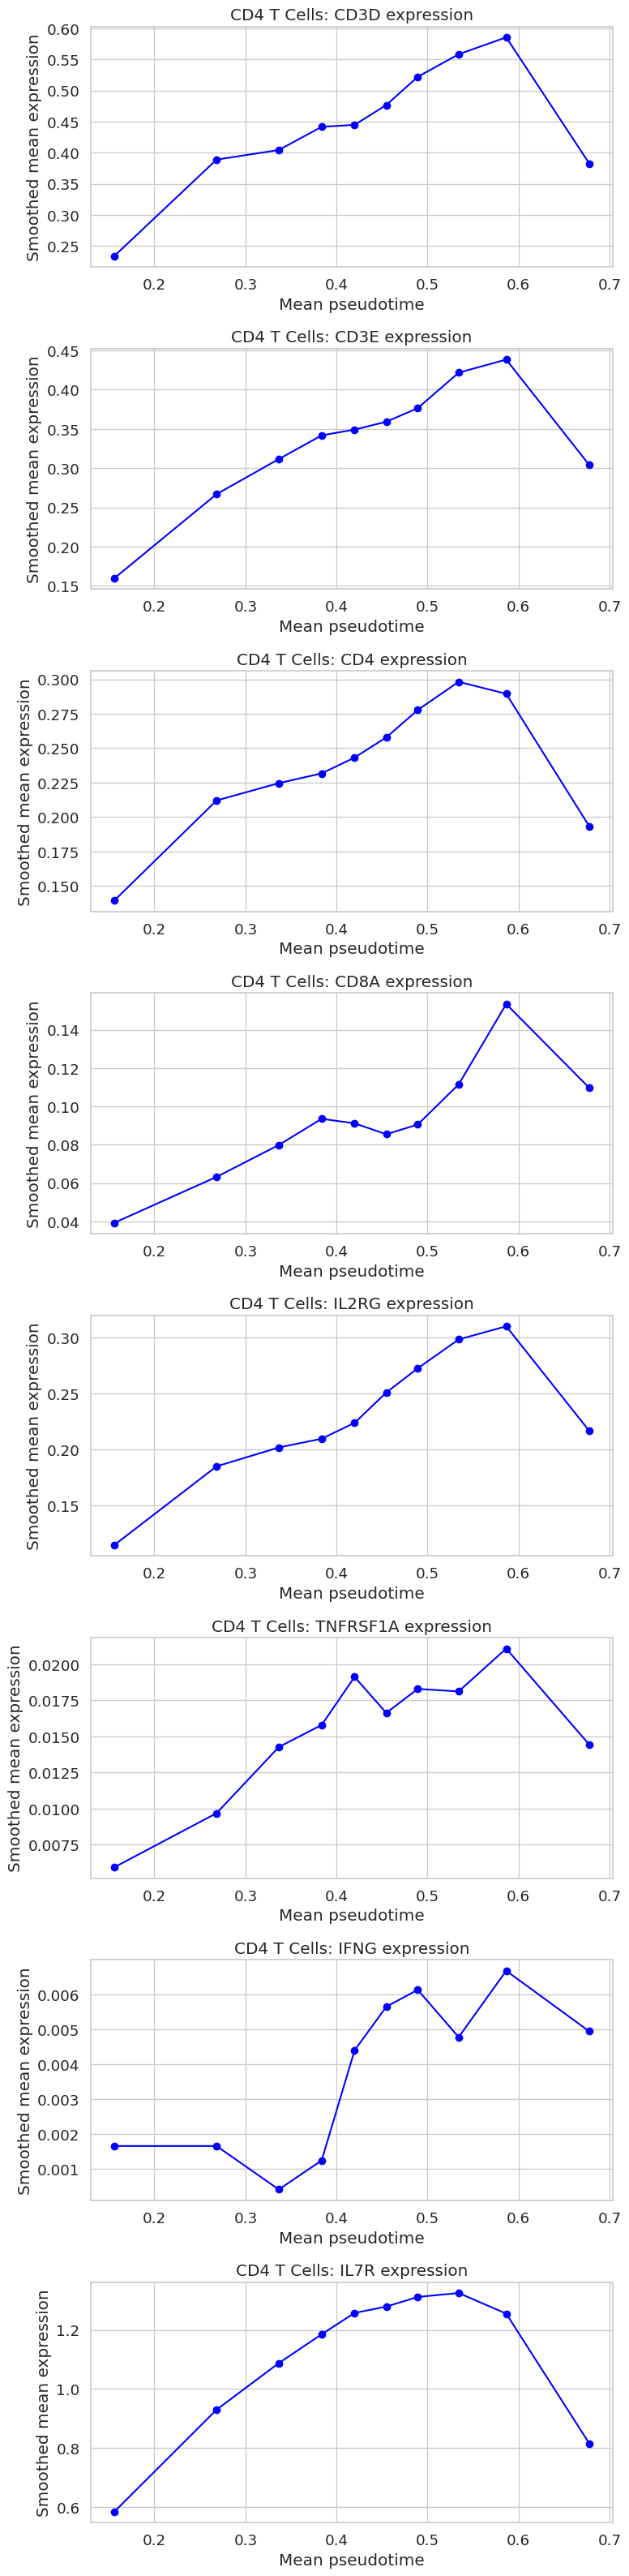

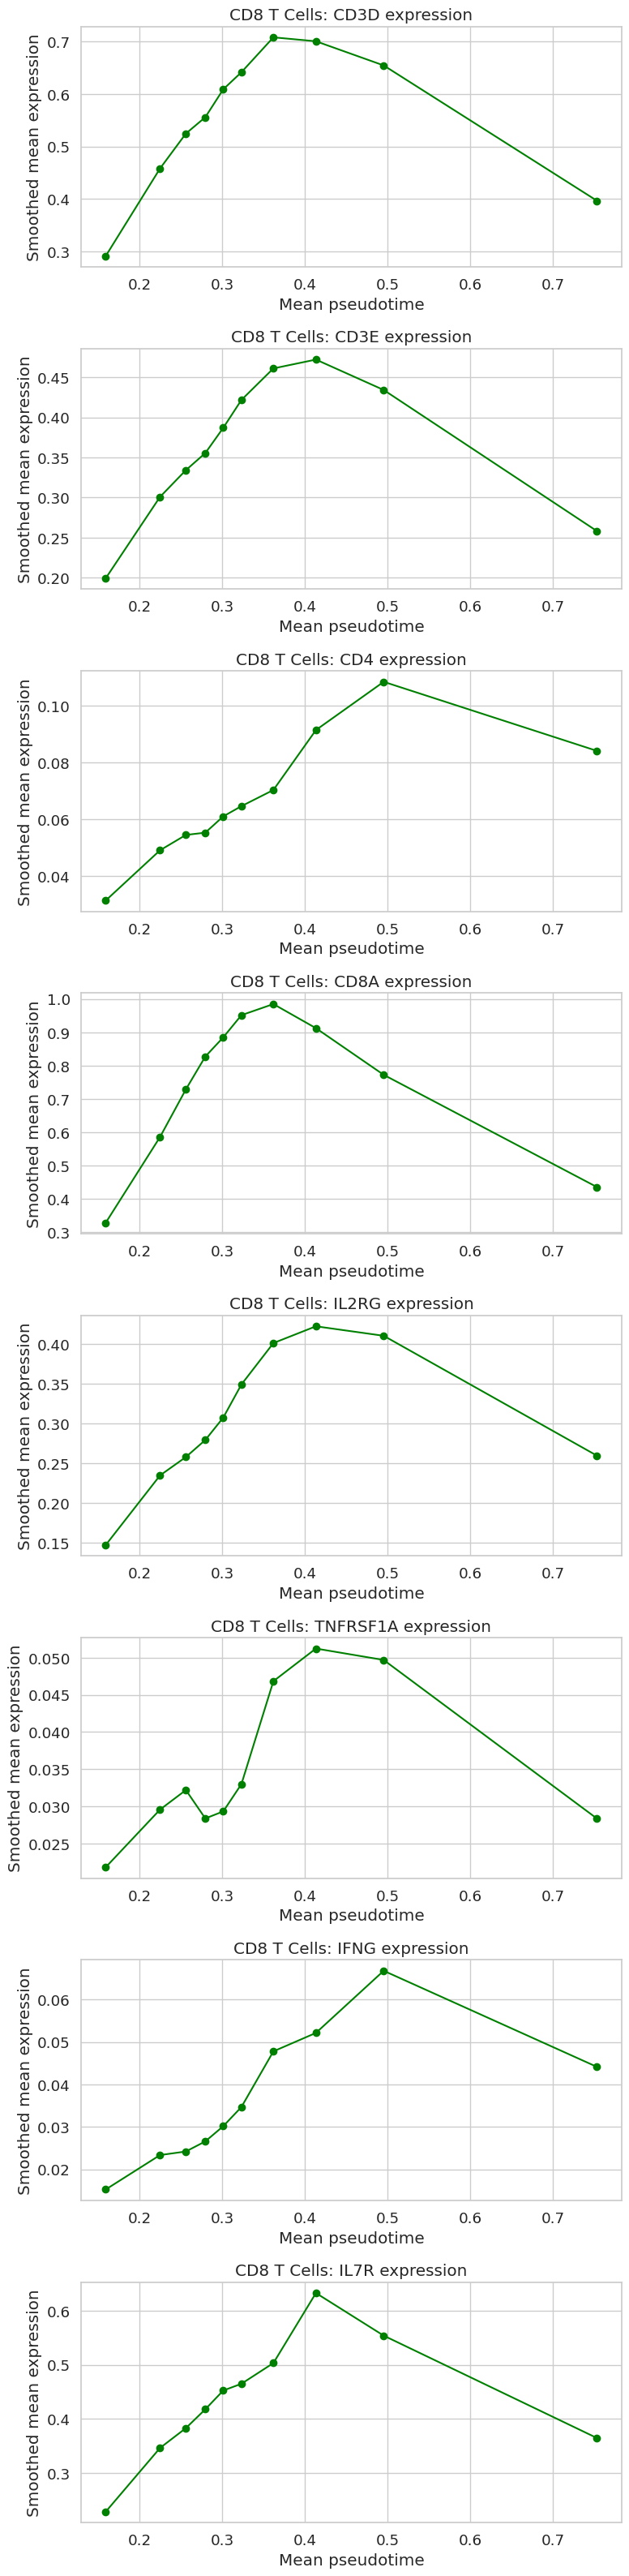

Spearman correlations for CD4 T cells:
CD3D: rho = 0.16, p-value = 1.49e-34
CD3E: rho = 0.17, p-value = 1.45e-36
CD4: rho = 0.09, p-value = 1.85e-10
CD8A: rho = 0.11, p-value = 3.90e-16
IL2RG: rho = 0.15, p-value = 7.67e-31
TNFRSF1A: rho = 0.04, p-value = 4.29e-03
IFNG: rho = 0.03, p-value = 9.09e-03
IL7R: rho = 0.14, p-value = 1.36e-26

Spearman correlations for CD8 T cells:
CD3D: rho = 0.14, p-value = 1.18e-18
CD3E: rho = 0.12, p-value = 2.50e-13
CD4: rho = 0.12, p-value = 4.35e-14
CD8A: rho = 0.10, p-value = 1.42e-10
IL2RG: rho = 0.18, p-value = 3.34e-29
TNFRSF1A: rho = 0.05, p-value = 3.23e-03
IFNG: rho = 0.11, p-value = 5.56e-11
IL7R: rho = 0.10, p-value = 7.75e-11


In [5]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Define candidate immune signaling genes relevant for T cell communication
candidate_genes = ['CD3D', 'CD3E', 'CD4', 'CD8A', 'IL2RG', 'TNFRSF1A', 'IFNG', 'IL7R']

# Subset candidate genes that exist in each AnnData object for CD4 and CD8 T cells
genes_cd4 = [g for g in candidate_genes if g in cd4_cells.var_names]
if len(genes_cd4) == 0:
    warnings.warn('No candidate genes found for CD4 T cells.')

genes_cd8 = [g for g in candidate_genes if g in cd8_cells.var_names]
if len(genes_cd8) == 0:
    warnings.warn('No candidate genes found for CD8 T cells.')

# Function for simple moving average smoothing
def smooth_series(series, window_size=3):
    return np.convolve(series, np.ones(window_size)/window_size, mode='same')

# Create DataFrames for expression data (convert from sparse if needed)
df_cd4 = pd.DataFrame(cd4_cells.X.toarray() if hasattr(cd4_cells.X, 'toarray') else cd4_cells.X,
                       index=cd4_cells.obs_names, columns=cd4_cells.var_names)
df_cd8 = pd.DataFrame(cd8_cells.X.toarray() if hasattr(cd8_cells.X, 'toarray') else cd8_cells.X,
                       index=cd8_cells.obs_names, columns=cd8_cells.var_names)

# Add diffusion pseudotime values to each DataFrame
if 'dpt_pseudotime' not in cd4_cells.obs:
    raise ValueError('cd4_cells does not contain diffusion pseudotime (dpt_pseudotime).')
if 'dpt_pseudotime' not in cd8_cells.obs:
    raise ValueError('cd8_cells does not contain diffusion pseudotime (dpt_pseudotime).')

df_cd4['pseudotime'] = cd4_cells.obs['dpt_pseudotime']
df_cd8['pseudotime'] = cd8_cells.obs['dpt_pseudotime']

# Bin cells along pseudotime using quantile-based binning to even out cell counts
num_bins = 10
try:
    df_cd4['pt_bin'] = pd.qcut(df_cd4['pseudotime'], q=num_bins)
except ValueError:
    warnings.warn('Too few unique pseudotime values in CD4 cells; falling back to pd.cut.')
    df_cd4['pt_bin'] = pd.cut(df_cd4['pseudotime'], bins=num_bins)

try:
    df_cd8['pt_bin'] = pd.qcut(df_cd8['pseudotime'], q=num_bins)
except ValueError:
    warnings.warn('Too few unique pseudotime values in CD8 cells; falling back to pd.cut.')
    df_cd8['pt_bin'] = pd.cut(df_cd8['pseudotime'], bins=num_bins)

# Group by bins and compute mean pseudotime and candidate gene expression
agg_dict_cd4 = {'pseudotime': 'mean'}
for gene in genes_cd4:
    agg_dict_cd4[gene] = 'mean'
bin_cd4 = df_cd4.groupby('pt_bin').agg(agg_dict_cd4).reset_index()

agg_dict_cd8 = {'pseudotime': 'mean'}
for gene in genes_cd8:
    agg_dict_cd8[gene] = 'mean'
bin_cd8 = df_cd8.groupby('pt_bin').agg(agg_dict_cd8).reset_index()

# Smooth the expression data using moving average smoothing
for gene in genes_cd4:
    bin_cd4[gene + '_smoothed'] = smooth_series(bin_cd4[gene].values, window_size=3)
for gene in genes_cd8:
    bin_cd8[gene + '_smoothed'] = smooth_series(bin_cd8[gene].values, window_size=3)

# Plot expression dynamics for candidate genes in CD4 T cells
if len(genes_cd4) > 0:
    fig_cd4, axes_cd4 = plt.subplots(len(genes_cd4), 1, figsize=(8, 4 * len(genes_cd4)))
    if len(genes_cd4) == 1:
        axes_cd4 = [axes_cd4]
    for i, gene in enumerate(genes_cd4):
        axes_cd4[i].plot(bin_cd4['pseudotime'], bin_cd4[gene + '_smoothed'], marker='o', color='blue')
        axes_cd4[i].set_title(f'CD4 T Cells: {gene} expression')
        axes_cd4[i].set_xlabel('Mean pseudotime')
        axes_cd4[i].set_ylabel('Smoothed mean expression')
    plt.tight_layout()
    plt.show()

# Plot expression dynamics for candidate genes in CD8 T cells
if len(genes_cd8) > 0:
    fig_cd8, axes_cd8 = plt.subplots(len(genes_cd8), 1, figsize=(8, 4 * len(genes_cd8)))
    if len(genes_cd8) == 1:
        axes_cd8 = [axes_cd8]
    for i, gene in enumerate(genes_cd8):
        axes_cd8[i].plot(bin_cd8['pseudotime'], bin_cd8[gene + '_smoothed'], marker='o', color='green')
        axes_cd8[i].set_title(f'CD8 T Cells: {gene} expression')
        axes_cd8[i].set_xlabel('Mean pseudotime')
        axes_cd8[i].set_ylabel('Smoothed mean expression')
    plt.tight_layout()
    plt.show()

# Compute and print Spearman correlations between gene expression and pseudotime for each cell type
print('Spearman correlations for CD4 T cells:')
for gene in genes_cd4:
    rho, pval = stats.spearmanr(df_cd4['pseudotime'], df_cd4[gene])
    print(f'{gene}: rho = {rho:.2f}, p-value = {pval:.2e}')

print('\nSpearman correlations for CD8 T cells:')
for gene in genes_cd8:
    rho, pval = stats.spearmanr(df_cd8['pseudotime'], df_cd8[gene])
    print(f'{gene}: rho = {rho:.2f}, p-value = {pval:.2e}')

### Agent Interpretation

The results from the Spearman correlation analysis for CD4 and CD8 T cells show relatively modest correlation coefficients (rho values around 0.1 to 0.18) but highly significant p-values, indicating statistically significant correlations with gene expression. However, these correlations are weak, suggesting limited biological relevance individually. Nonetheless, the data allows focus on certain genes for potential follow-up:

### Promising Observations:
1. **IL2RG and IL7R** in both CD4 and CD8 T cells show relatively higher correlation values. These genes are involved in T cell survival and proliferation, suggesting a potential role in immune responses during COVID-19.
2. **TNFRSF1A** gene shows a modest but significant correlation. This receptor is known to mediate TNF-induced signaling pathways, which could be relevant to inflammation in severe COVID-19.
3. **Pseudotime Analysis** indicates dynamic expression changes over time, particularly for key immune-related genes. For example, changes in CD3D, IL2RG, and TNFRSF1A could be related to disease progression or immune response phases.

### Future Steps:
1. **Pathway Analysis**: Focus on genes with modest but significant correlations and their biological pathways. IL2RG and IL7R, being related to survival and proliferation, might be involved in broader immune activation pathways. Use pathway enrichment analyses to explore these in-depth.
2. **Comparative Study**: Compare gene expression and pseudotime dynamics between COVID-19 patients with different severity levels. This could highlight how gene expression changes correlate with disease progression.
3. **Cell-Cell Communication Analyses**: Investigate interactions specifically between monocytes and T cell subsets focusing on receptors and ligands identified, like those involving TNFRSF1A. This aligns with and could validate the initial hypothesis about monocyte-T cell signaling dysregulation.
4. **Integration with Previous Findings**: Cross-reference these findings with previous analyses of monocyte HLA Class II downregulation and ISG expression, to assess the impact on T cell function and signaling.

These analyses could help validate the hypothesis on dysregulated communication pathways in severe COVID-19 and provide insights into potential therapeutic targets.

## The code subsets COVID-19 T cells into CD4 and CD8 populations, checks for the presence of key IL2/IL7 pathway genes in both subsets, and computes a gene signature score if a valid gene list exists. It then calculates Spearman correlations between Days Post Symptom Onset (DPS) and the pathway score, followed by visualization of the associations using scatter plots with regression lines.

Number of CD4 T cells: 5562
Number of CD8 T cells: 3877
Using pathway genes: ['IL2RG', 'IL7R', 'CD3D', 'CD3E']
computing score 'IL2_IL7_score'


    finished: added
    'IL2_IL7_score', score of gene set (adata.obs).
    50 total control genes are used. (0:00:05)


computing score 'IL2_IL7_score'


    finished: added
    'IL2_IL7_score', score of gene set (adata.obs).
    50 total control genes are used. (0:00:03)


CD4 T Cells: Spearman correlation between DPS and IL2_IL7 score: rho = 0.03, p = 1.35e-02
CD8 T Cells: Spearman correlation between DPS and IL2_IL7 score: rho = 0.04, p = 2.21e-02


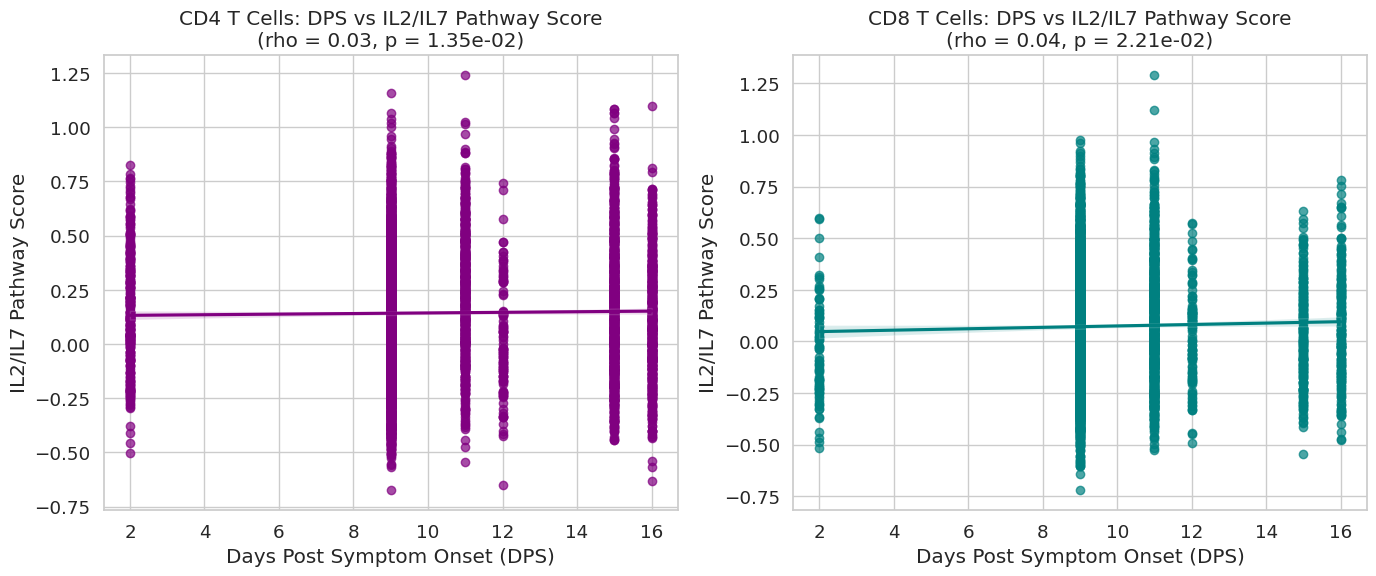

In [6]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Subset COVID-19 T cells for CD4 and CD8 T cells
covid_cells = adata[adata.obs['Status'] == 'COVID']
cd4_path = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD4 T']
cd8_path = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD8 T']

print('Number of CD4 T cells:', cd4_path.n_obs)
print('Number of CD8 T cells:', cd8_path.n_obs)

# Define the IL2/IL7 pathway gene signature
candidate_signature = ['IL2RG', 'IL7R', 'CD3D', 'CD3E']

# Intersect with genes available in both CD4 and CD8 subsets to capture genes robustly expressed in T cells
pathway_genes = [g for g in candidate_signature if (g in cd4_path.var_names and g in cd8_path.var_names)]
if len(pathway_genes) == 0:
    warnings.warn('None of the specified pathway genes are present in both CD4 and CD8 datasets. Skipping pathway score computation.')
else:
    print('Using pathway genes:', pathway_genes)
    
    # Compute the pathway score for CD4 and CD8 T cells
    sc.tl.score_genes(cd4_path, gene_list=pathway_genes, score_name='IL2_IL7_score', random_state=0)
    sc.tl.score_genes(cd8_path, gene_list=pathway_genes, score_name='IL2_IL7_score', random_state=0)

# Ensure DPS is numeric
cd4_path.obs['DPS'] = pd.to_numeric(cd4_path.obs['DPS'], errors='coerce')
cd8_path.obs['DPS'] = pd.to_numeric(cd8_path.obs['DPS'], errors='coerce')

# Compute Spearman correlations between DPS and IL2_IL7 pathway score if scores exist
if 'IL2_IL7_score' in cd4_path.obs and 'IL2_IL7_score' in cd8_path.obs:
    rho_cd4, pval_cd4 = stats.spearmanr(cd4_path.obs['DPS'], cd4_path.obs['IL2_IL7_score'])
    rho_cd8, pval_cd8 = stats.spearmanr(cd8_path.obs['DPS'], cd8_path.obs['IL2_IL7_score'])

    print('CD4 T Cells: Spearman correlation between DPS and IL2_IL7 score: rho = {:.2f}, p = {:.2e}'.format(rho_cd4, pval_cd4))
    print('CD8 T Cells: Spearman correlation between DPS and IL2_IL7 score: rho = {:.2f}, p = {:.2e}'.format(rho_cd8, pval_cd8))

    # Plot scatter plots with regression lines for CD4 and CD8 T cells
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.regplot(x='DPS', y='IL2_IL7_score', data=cd4_path.obs, ax=axes[0], color='purple', scatter_kws={'alpha':0.7})
    axes[0].set_title('CD4 T Cells: DPS vs IL2/IL7 Pathway Score\n(rho = {:.2f}, p = {:.2e})'.format(rho_cd4, pval_cd4))
    axes[0].set_xlabel('Days Post Symptom Onset (DPS)')
    axes[0].set_ylabel('IL2/IL7 Pathway Score')

    sns.regplot(x='DPS', y='IL2_IL7_score', data=cd8_path.obs, ax=axes[1], color='teal', scatter_kws={'alpha':0.7})
    axes[1].set_title('CD8 T Cells: DPS vs IL2/IL7 Pathway Score\n(rho = {:.2f}, p = {:.2e})'.format(rho_cd8, pval_cd8))
    axes[1].set_xlabel('Days Post Symptom Onset (DPS)')
    axes[1].set_ylabel('IL2/IL7 Pathway Score')

    plt.tight_layout()
    plt.show()
else:
    print('Pathway score not computed due to absence of valid pathway genes.')


### Agent Interpretation

The results show a weak positive correlation between the IL2/IL7 pathway score and Days Post Symptom Onset (DPS) in both CD4 and CD8 T cells, with Spearman's rho values of 0.03 and 0.04, respectively. Although the correlations are statistically significant (p-values < 0.05), the correlation coefficients indicate a very weak relationship. 

### Feedback and Recommendations:

1. **Biological Context**: 
   - The weak correlation suggests that changes in the IL2/IL7 pathway over time may not be strongly related to the duration of symptoms in T cells for this context. Consider if the pathway selection truly aligns with the biological processes relevant to severe COVID-19.

2. **Pathway Analysis**:
   - Further analyze whether other pathways might show stronger correlation or significance by expanding the pathway analysis to include other relevant cytokine pathways, such as those involving TNF, IL1, or IL6, as they are central to the paper’s hypotheses.

3. **Longitudinal Analysis**:
   - Consider performing a longitudinal analysis using a mixed-effects model to evaluate more complex relationships between symptom progression and immune response, accounting for individual variability across patients.

4. **Integration with Existing Data**:
   - Integrate these findings with other clinical and molecular data from the dataset, such as gene expression changes or clinical severity scores, to provide a more comprehensive interpretation.

5. **Comparative Analysis**:
   - Compare these results with data from healthy controls to understand if the observed changes are unique to severe COVID-19.

6. **Subpopulation Analysis**:
   - Given the heterogeneity within the T cell populations, explore sub-clustering to see if specific subpopulations exhibit stronger correlations with DPS.

7. **Further Hypothesis Testing**:
   - Use these insights to refine hypotheses on immune dysregulation in severe COVID-19 and inform the selection of targeted biomarkers or pathways for future analyses.

These steps could refine the understanding of T cell involvement in severe COVID-19 and potentially identify novel immune dysregulation mechanisms.

## This code subsets the T cells (CD4 and CD8) from both COVID-19 and Healthy samples, validates the presence of the inflammatory cytokine receptor signature genes, computes an inflammatory pathway score with Scanpy, and performs a Spearman correlation between the score and DPS. It also includes enhanced error handling and multiple visualization methods including both scatter plots with regression lines and boxplots.

CD4 COVID cells: 5562
CD8 COVID cells: 3877
CD4 Healthy cells: 2835
CD8 Healthy cells: 2885
computing score 'Inflam_score'


    finished: added
    'Inflam_score', score of gene set (adata.obs).
    150 total control genes are used. (0:00:04)


computing score 'Inflam_score'


    finished: added
    'Inflam_score', score of gene set (adata.obs).
    150 total control genes are used. (0:00:02)


computing score 'Inflam_score'


    finished: added
    'Inflam_score', score of gene set (adata.obs).
    150 total control genes are used. (0:00:02)


computing score 'Inflam_score'


    finished: added
    'Inflam_score', score of gene set (adata.obs).
    150 total control genes are used. (0:00:02)


CD4 T cells (COVID) - Spearman correlation (DPS vs Inflam_score): rho = 0.03, p = 6.12e-02
CD8 T cells (COVID) - Spearman correlation (DPS vs Inflam_score): rho = 0.04, p = 2.72e-02
CD4 T cells (Healthy) - Spearman correlation (DPS vs Inflam_score): rho = nan, p = nan
CD8 T cells (Healthy) - Spearman correlation (DPS vs Inflam_score): rho = nan, p = nan


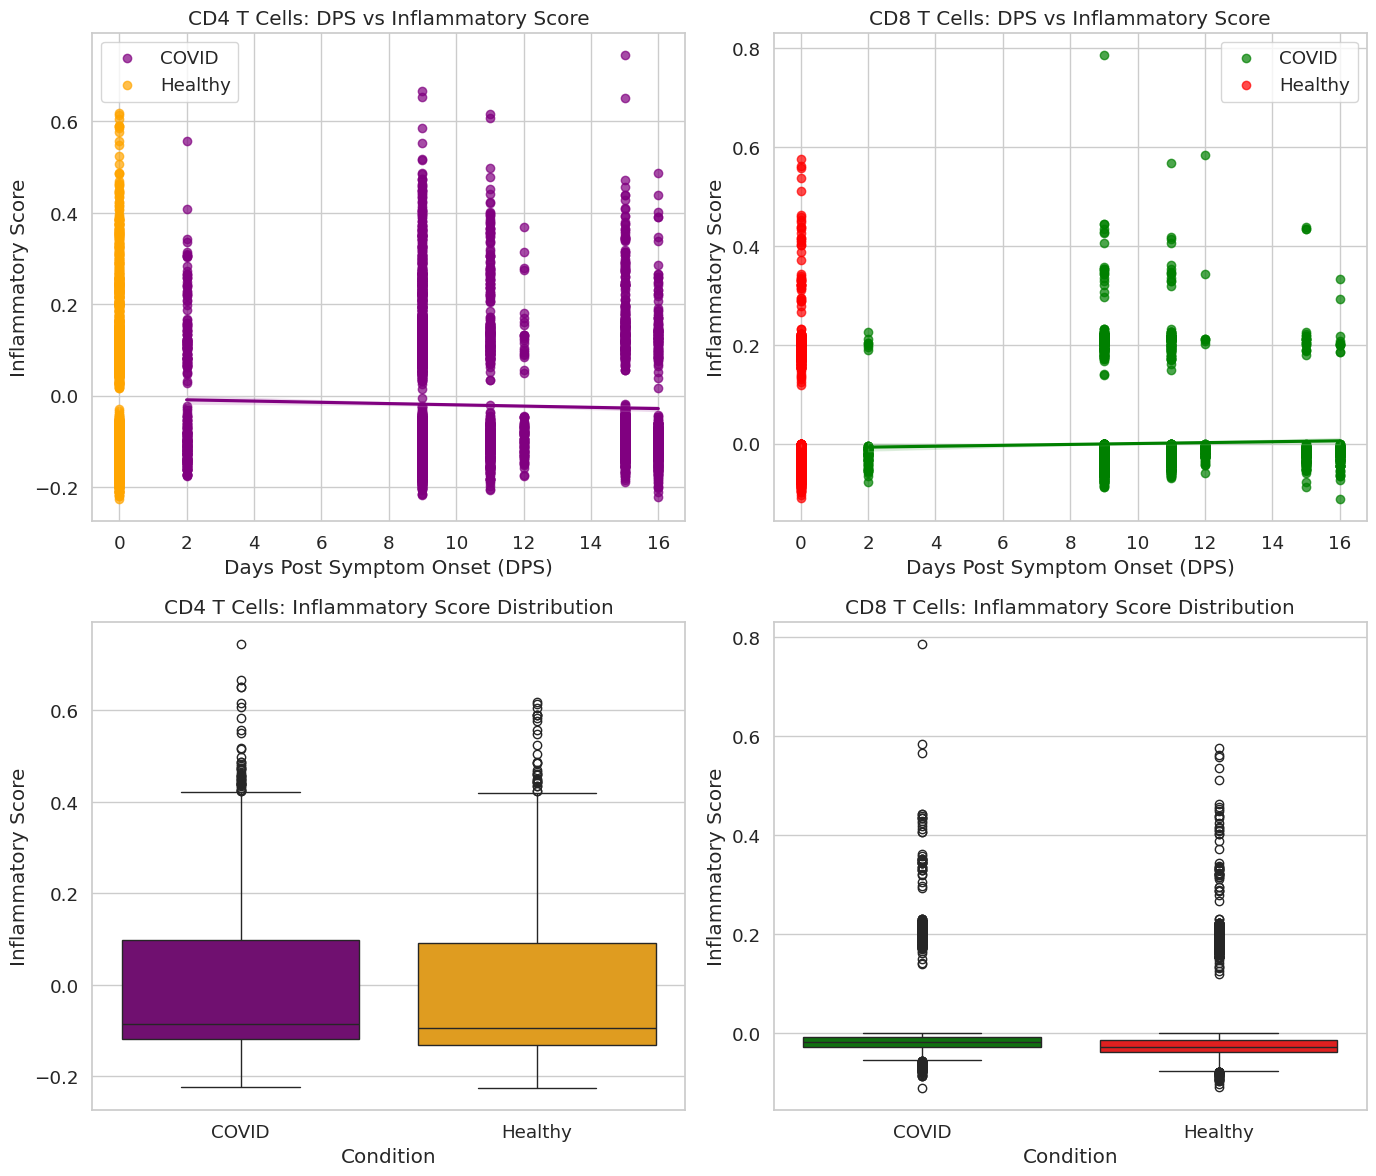

In [7]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Subset T cells from COVID-19 and Healthy samples
covid_cells = adata[adata.obs['Status'] == 'COVID']
healthy_cells = adata[adata.obs['Status'] == 'Healthy']

cd4_covid = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD4 T']
cd8_covid = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD8 T']

cd4_healthy = healthy_cells[healthy_cells.obs['cell_type_coarse'] == 'CD4 T']
cd8_healthy = healthy_cells[healthy_cells.obs['cell_type_coarse'] == 'CD8 T']

print('CD4 COVID cells:', cd4_covid.n_obs)
print('CD8 COVID cells:', cd8_covid.n_obs)
print('CD4 Healthy cells:', cd4_healthy.n_obs)
print('CD8 Healthy cells:', cd8_healthy.n_obs)

# Define the inflammatory cytokine receptor signature
inflam_genes = ['TNFRSF1A', 'IL1R1', 'IL6R']

# Function to return valid genes present in the dataset

def get_valid_genes(adata_subset, gene_list):
    valid = [g for g in gene_list if g in adata_subset.var_names]
    return valid

# Validate genes for each subset
valid_genes_cd4_covid = get_valid_genes(cd4_covid, inflam_genes)
valid_genes_cd8_covid = get_valid_genes(cd8_covid, inflam_genes)
valid_genes_cd4_healthy = get_valid_genes(cd4_healthy, inflam_genes)
valid_genes_cd8_healthy = get_valid_genes(cd8_healthy, inflam_genes)

# Check if any subset completely lacks the signature genes
if not (valid_genes_cd4_covid and valid_genes_cd8_covid and valid_genes_cd4_healthy and valid_genes_cd8_healthy):
    msg = ('One or more T cell subsets do not contain any of the inflammatory signature genes. ' 
           'Please verify the dataset or consider alternative gene markers.')
    raise ValueError(msg)

# Compute inflammatory pathway scores for each subset
sc.tl.score_genes(cd4_covid, gene_list=valid_genes_cd4_covid, score_name='Inflam_score', random_state=0)
sc.tl.score_genes(cd8_covid, gene_list=valid_genes_cd8_covid, score_name='Inflam_score', random_state=0)
sc.tl.score_genes(cd4_healthy, gene_list=valid_genes_cd4_healthy, score_name='Inflam_score', random_state=0)
sc.tl.score_genes(cd8_healthy, gene_list=valid_genes_cd8_healthy, score_name='Inflam_score', random_state=0)

# Convert DPS to numeric for proper statistical analysis
for ad in [cd4_covid, cd8_covid, cd4_healthy, cd8_healthy]:
    ad.obs['DPS'] = pd.to_numeric(ad.obs['DPS'], errors='coerce')

# Compute Spearman correlation between DPS and Inflammatory Score and print results

def compute_and_print_correlation(adata_obj, cell_type, condition):
    rho, pval = stats.spearmanr(adata_obj.obs['DPS'], adata_obj.obs['Inflam_score'], nan_policy='omit')
    print(f'{cell_type} ({condition}) - Spearman correlation (DPS vs Inflam_score): rho = {rho:.2f}, p = {pval:.2e}')
    return rho, pval

rho_cd4_covid, pval_cd4_covid = compute_and_print_correlation(cd4_covid, 'CD4 T cells', 'COVID')
rho_cd8_covid, pval_cd8_covid = compute_and_print_correlation(cd8_covid, 'CD8 T cells', 'COVID')
rho_cd4_healthy, pval_cd4_healthy = compute_and_print_correlation(cd4_healthy, 'CD4 T cells', 'Healthy')
rho_cd8_healthy, pval_cd8_healthy = compute_and_print_correlation(cd8_healthy, 'CD8 T cells', 'Healthy')

# Prepare data for visualization: create a DataFrame with DPS and Inflam_score for each cell type
def create_df(adata_list, labels):
    frames = []
    for ad, lab in zip(adata_list, labels):
        df = pd.DataFrame({
            'DPS': ad.obs['DPS'],
            'Inflam_score': ad.obs['Inflam_score']
        })
        df['Condition'] = lab
        frames.append(df)
    return pd.concat(frames, axis=0)

cd4_df = create_df([cd4_covid, cd4_healthy], ['COVID', 'Healthy'])
cd8_df = create_df([cd8_covid, cd8_healthy], ['COVID', 'Healthy'])

# Visualization: Scatter plots with regression lines and supplementary boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plots with regression lines
sns.regplot(x='DPS', y='Inflam_score', data=cd4_df[cd4_df['Condition']=='COVID'], ax=axes[0,0], color='purple', scatter_kws={'alpha':0.7}, label='COVID')
sns.regplot(x='DPS', y='Inflam_score', data=cd4_df[cd4_df['Condition']=='Healthy'], ax=axes[0,0], color='orange', scatter_kws={'alpha':0.7}, label='Healthy')
axes[0,0].set_title('CD4 T Cells: DPS vs Inflammatory Score')
axes[0,0].set_xlabel('Days Post Symptom Onset (DPS)')
axes[0,0].set_ylabel('Inflammatory Score')
axes[0,0].legend()

sns.regplot(x='DPS', y='Inflam_score', data=cd8_df[cd8_df['Condition']=='COVID'], ax=axes[0,1], color='green', scatter_kws={'alpha':0.7}, label='COVID')
sns.regplot(x='DPS', y='Inflam_score', data=cd8_df[cd8_df['Condition']=='Healthy'], ax=axes[0,1], color='red', scatter_kws={'alpha':0.7}, label='Healthy')
axes[0,1].set_title('CD8 T Cells: DPS vs Inflammatory Score')
axes[0,1].set_xlabel('Days Post Symptom Onset (DPS)')
axes[0,1].set_ylabel('Inflammatory Score')
axes[0,1].legend()

# Supplementary boxplots for comparing inflammatory score distributions
sns.boxplot(x='Condition', y='Inflam_score', data=cd4_df, ax=axes[1,0], palette={'COVID':'purple', 'Healthy':'orange'})
axes[1,0].set_title('CD4 T Cells: Inflammatory Score Distribution')
axes[1,0].set_xlabel('Condition')
axes[1,0].set_ylabel('Inflammatory Score')

sns.boxplot(x='Condition', y='Inflam_score', data=cd8_df, ax=axes[1,1], palette={'COVID':'green', 'Healthy':'red'})
axes[1,1].set_title('CD8 T Cells: Inflammatory Score Distribution')
axes[1,1].set_xlabel('Condition')
axes[1,1].set_ylabel('Inflammatory Score')

plt.tight_layout()
plt.show()

### Agent Interpretation

### Feedback:

1. **Cell Count Results**:
   - There's a higher count of CD4 and CD8 T cells in COVID-19 samples compared to healthy controls. This indicates an immune response but requires further exploration to understand the specific roles these cells might play.

2. **Inflammatory Score**:
   - The correlation between the inflammatory score and days post symptom onset (DPS) is very weak for both CD4 and CD8 T cells in COVID samples, with low rho values and p-values indicating marginal significance for CD8 cells. For healthy samples, the analysis returned `nan`, suggesting inappropriate data or calculation errors.
   - The correlation results might not be meaningful for differentiating between conditions based solely on the inflammatory score and DPS.

3. **Score Distributions**:
   - The distribution of the inflammatory scores shows overlap between COVID and healthy samples for both CD4 and CD8 T cells. This indicates the inflammatory score might not be a strong differentiator on its own.

4. **Future Steps**:
   - **Explore Additional Markers**: Consider including other markers or scores that might be more sensitive to changes specific to COVID-19 infection, like those related to cytokine expression.
   - **Subset Analysis**: Since significant differences were not observed at a general level, delving into specific T cell subsets or utilizing additional dimensionality reduction techniques might uncover nuanced patterns.
   - **Pathway Enrichment**: Conduct pathway enrichment analysis based on differential expression in T cells, focusing on pathways relevant to inflammation and immune signaling.
   - **Beyond Inflammatory Scores**: Investigate other potential indicators such as T cell exhaustion markers or specific ligand-receptor interaction analysis focused on immune signaling pathways.
   - **Correction of Errors**: Investigate why `nan` results were obtained for healthy samples to ensure accurate data processing and analyses.
   - **Insight from Other Cells**: Explore interactions with other immune cells (e.g., monocytes) to build on the hypothesis of dysregulated communication between these populations.

The current results provide a baseline but suggest the need for more detailed and targeted analyses to support the hypothesis regarding T cell communication and COVID-19 pathology.

## This code updates the mitochondrial stress analysis by first subsetting CD4 and CD8 T cells from COVID and Healthy samples, then validating the mitochondrial gene signature while logging any missing genes. It computes mitochondrial stress scores, evaluates correlations with DPS using Spearman's test, and annotates scatter plots with correlation coefficients and p-values to enhance result interpretation.

computing score 'mt_stress_score'


    finished: added
    'mt_stress_score', score of gene set (adata.obs).
    50 total control genes are used. (0:00:04)


computing score 'mt_stress_score'


    finished: added
    'mt_stress_score', score of gene set (adata.obs).
    50 total control genes are used. (0:00:03)


computing score 'mt_stress_score'


    finished: added
    'mt_stress_score', score of gene set (adata.obs).
    59 total control genes are used. (0:00:02)


computing score 'mt_stress_score'


    finished: added
    'mt_stress_score', score of gene set (adata.obs).
    58 total control genes are used. (0:00:02)


CD4 T cells (COVID) - Spearman correlation (DPS vs mt_stress_score): rho = -0.10, p = 1.03e-12
CD8 T cells (COVID) - Spearman correlation (DPS vs mt_stress_score): rho = -0.04, p = 1.80e-02
CD4 T cells (Healthy) - Spearman correlation (DPS vs mt_stress_score): rho = nan, p = nan
CD8 T cells (Healthy) - Spearman correlation (DPS vs mt_stress_score): rho = nan, p = nan


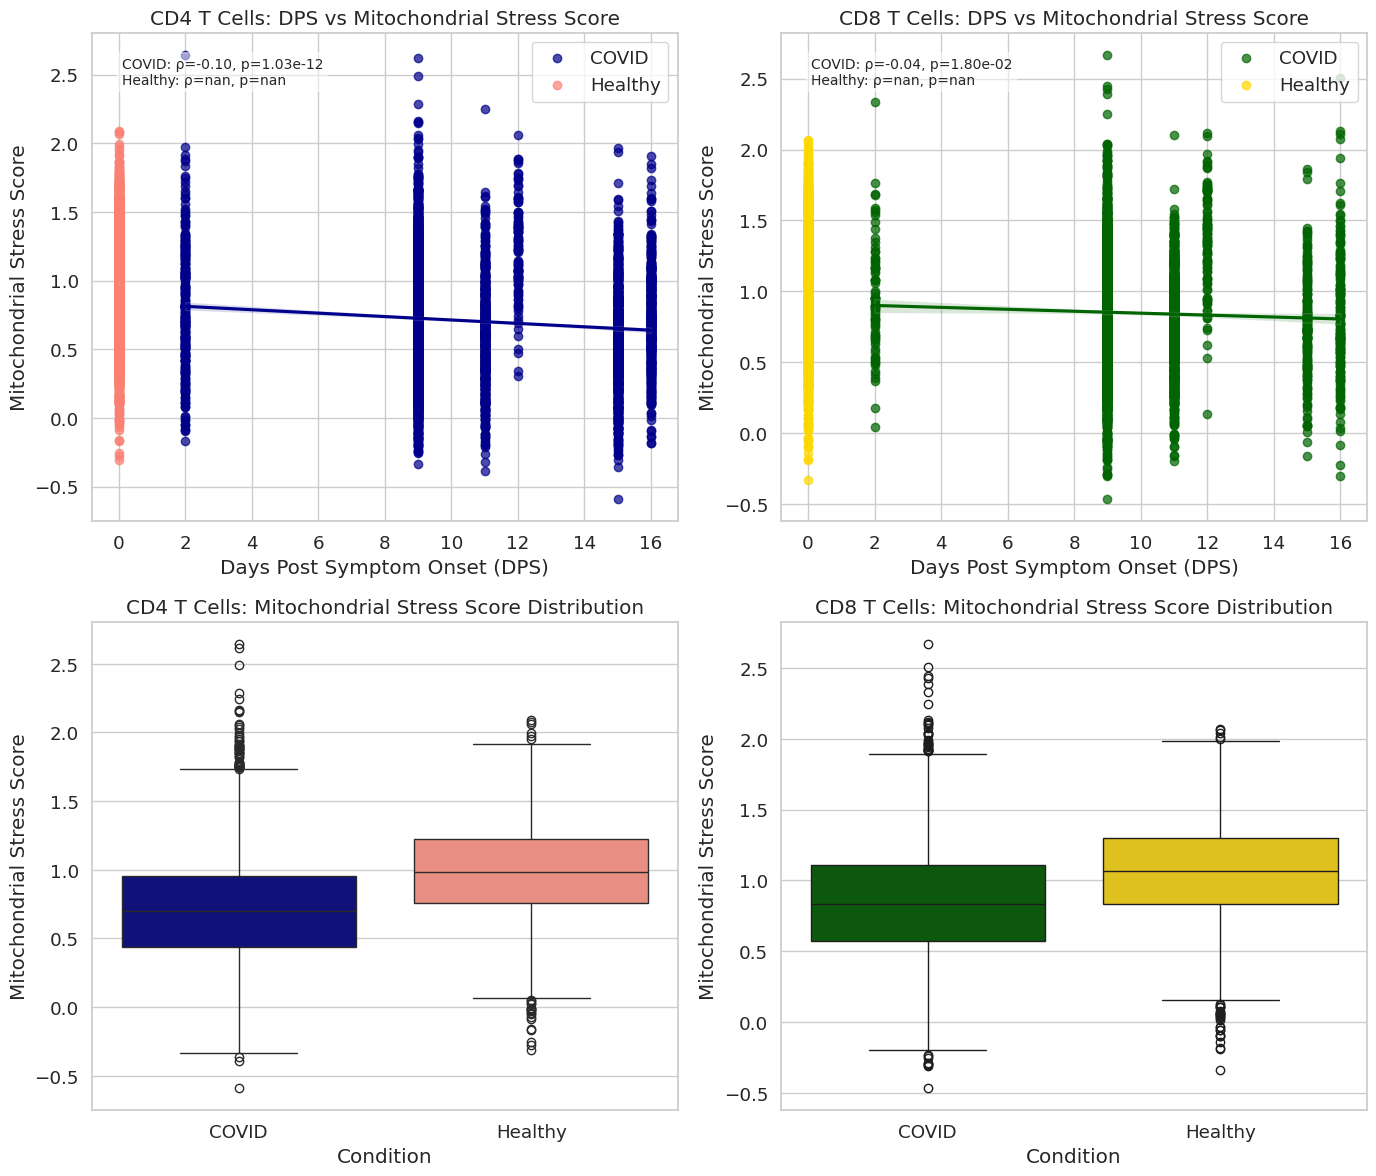

In [8]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Subset T cells for COVID and Healthy samples
covid_cells = adata[adata.obs['Status'] == 'COVID']
healthy_cells = adata[adata.obs['Status'] == 'Healthy']

cd4_covid = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD4 T']
cd8_covid = covid_cells[covid_cells.obs['cell_type_coarse'] == 'CD8 T']

cd4_healthy = healthy_cells[healthy_cells.obs['cell_type_coarse'] == 'CD4 T']
cd8_healthy = healthy_cells[healthy_cells.obs['cell_type_coarse'] == 'CD8 T']

# Define a mitochondrial stress gene signature using common mitochondrial genes
mt_genes = ['MT-CO1', 'MT-CO2', 'MT-ND1', 'MT-ND2', 'MT-ATP6']

def get_valid_mt_genes(adata_subset, gene_list):
    valid = [g for g in gene_list if g in adata_subset.var_names]
    missing = [g for g in gene_list if g not in adata_subset.var_names]
    if missing:
        print(f"Warning: The following mitochondrial genes are missing in this subset: {missing}")
    return valid

# Validate mitochondrial genes for each subset
valid_mt_cd4_covid = get_valid_mt_genes(cd4_covid, mt_genes)
valid_mt_cd8_covid = get_valid_mt_genes(cd8_covid, mt_genes)
valid_mt_cd4_healthy = get_valid_mt_genes(cd4_healthy, mt_genes)
valid_mt_cd8_healthy = get_valid_mt_genes(cd8_healthy, mt_genes)

# Check if the mitochondrial gene signature is present in all subsets
if not (valid_mt_cd4_covid and valid_mt_cd8_covid and valid_mt_cd4_healthy and valid_mt_cd8_healthy):
    raise ValueError('One or more T cell subsets do not contain any of the mitochondrial gene signature. Please verify the dataset.')

# Compute mitochondrial stress score for each T cell subset
sc.tl.score_genes(cd4_covid, gene_list=valid_mt_cd4_covid, score_name='mt_stress_score', random_state=0)
sc.tl.score_genes(cd8_covid, gene_list=valid_mt_cd8_covid, score_name='mt_stress_score', random_state=0)
sc.tl.score_genes(cd4_healthy, gene_list=valid_mt_cd4_healthy, score_name='mt_stress_score', random_state=0)
sc.tl.score_genes(cd8_healthy, gene_list=valid_mt_cd8_healthy, score_name='mt_stress_score', random_state=0)

# Ensure DPS is numeric for all subsets
for ad in [cd4_covid, cd8_covid, cd4_healthy, cd8_healthy]:
    ad.obs['DPS'] = pd.to_numeric(ad.obs['DPS'], errors='coerce')

# Function to compute and print Spearman correlation between DPS and mitochondrial stress score
def compute_and_print_corr(adata_obj, cell_type, condition):
    rho, pval = stats.spearmanr(adata_obj.obs['DPS'], adata_obj.obs['mt_stress_score'], nan_policy='omit')
    print(f'{cell_type} ({condition}) - Spearman correlation (DPS vs mt_stress_score): rho = {rho:.2f}, p = {pval:.2e}')
    return rho, pval

rho_cd4_covid, pval_cd4_covid = compute_and_print_corr(cd4_covid, 'CD4 T cells', 'COVID')
rho_cd8_covid, pval_cd8_covid = compute_and_print_corr(cd8_covid, 'CD8 T cells', 'COVID')
rho_cd4_healthy, pval_cd4_healthy = compute_and_print_corr(cd4_healthy, 'CD4 T cells', 'Healthy')
rho_cd8_healthy, pval_cd8_healthy = compute_and_print_corr(cd8_healthy, 'CD8 T cells', 'Healthy')

# Prepare data for visualization: create a DataFrame with DPS and mt_stress_score for each subset

def create_mt_df(adata_list, labels):
    frames = []
    for ad, lab in zip(adata_list, labels):
        df = pd.DataFrame({
            'DPS': ad.obs['DPS'],
            'mt_stress_score': ad.obs['mt_stress_score']
        })
        df['Condition'] = lab
        frames.append(df)
    return pd.concat(frames, axis=0)

cd4_mt_df = create_mt_df([cd4_covid, cd4_healthy], ['COVID', 'Healthy'])
cd8_mt_df = create_mt_df([cd8_covid, cd8_healthy], ['COVID', 'Healthy'])

# Visualization: Scatter plots with regression lines and boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plots for CD4 T cells
sns.regplot(x='DPS', y='mt_stress_score', data=cd4_mt_df[cd4_mt_df['Condition']=='COVID'], ax=axes[0,0], color='darkblue', scatter_kws={'alpha':0.7}, label='COVID')
sns.regplot(x='DPS', y='mt_stress_score', data=cd4_mt_df[cd4_mt_df['Condition']=='Healthy'], ax=axes[0,0], color='salmon', scatter_kws={'alpha':0.7}, label='Healthy')
axes[0,0].set_title('CD4 T Cells: DPS vs Mitochondrial Stress Score')
axes[0,0].set_xlabel('Days Post Symptom Onset (DPS)')
axes[0,0].set_ylabel('Mitochondrial Stress Score')
axes[0,0].legend()
# Annotate correlation coefficients for CD4 T cells
axes[0,0].text(0.05, 0.95, f"COVID: ρ={rho_cd4_covid:.2f}, p={pval_cd4_covid:.2e}\nHealthy: ρ={rho_cd4_healthy:.2f}, p={pval_cd4_healthy:.2e}",
                transform=axes[0,0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Scatter plots for CD8 T cells
sns.regplot(x='DPS', y='mt_stress_score', data=cd8_mt_df[cd8_mt_df['Condition']=='COVID'], ax=axes[0,1], color='darkgreen', scatter_kws={'alpha':0.7}, label='COVID')
sns.regplot(x='DPS', y='mt_stress_score', data=cd8_mt_df[cd8_mt_df['Condition']=='Healthy'], ax=axes[0,1], color='gold', scatter_kws={'alpha':0.7}, label='Healthy')
axes[0,1].set_title('CD8 T Cells: DPS vs Mitochondrial Stress Score')
axes[0,1].set_xlabel('Days Post Symptom Onset (DPS)')
axes[0,1].set_ylabel('Mitochondrial Stress Score')
axes[0,1].legend()
# Annotate correlation coefficients for CD8 T cells
axes[0,1].text(0.05, 0.95, f"COVID: ρ={rho_cd8_covid:.2f}, p={pval_cd8_covid:.2e}\nHealthy: ρ={rho_cd8_healthy:.2f}, p={pval_cd8_healthy:.2e}",
                transform=axes[0,1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Boxplots for score distribution in CD4 T cells
sns.boxplot(x='Condition', y='mt_stress_score', data=cd4_mt_df, ax=axes[1,0], palette={'COVID':'darkblue', 'Healthy':'salmon'})
axes[1,0].set_title('CD4 T Cells: Mitochondrial Stress Score Distribution')
axes[1,0].set_xlabel('Condition')
axes[1,0].set_ylabel('Mitochondrial Stress Score')

# Boxplots for score distribution in CD8 T cells
sns.boxplot(x='Condition', y='mt_stress_score', data=cd8_mt_df, ax=axes[1,1], palette={'COVID':'darkgreen', 'Healthy':'gold'})
axes[1,1].set_title('CD8 T Cells: Mitochondrial Stress Score Distribution')
axes[1,1].set_xlabel('Condition')
axes[1,1].set_ylabel('Mitochondrial Stress Score')

plt.tight_layout()
plt.show()

### Agent Interpretation

The analysis of the mitochondrial stress score provides some interesting insights, especially in the context of COVID-19. Here's what stands out and potential next steps:

1. **CD4 and CD8 T Cells Analysis**:
   - In COVID-19 patients, the negative correlation between DPS (Days Post Symptom Onset) and mitochondrial stress score indicates a potential decline in stress as time progresses. The correlations are weak (rho = -0.10 and rho = -0.04) but significant due to large p-values.
   - For healthy controls, data is missing (nan), which makes direct comparisons difficult. Ensuring complete data for healthy individuals would be crucial for a robust comparison.

2. **Boxplot Observations**:
   - The distribution of mitochondrial stress scores doesn't show a stark difference between COVID-19 and healthy individuals, which suggests that factors other than mitochondrial stress may be influencing disease progression or severity.
   - Consider expanding this analysis to other immune cell types to identify differential stress responses.

3. **Hypothesis Validation**:
   - The original hypothesis in the research paper involves enhanced interaction between monocytes and T cells driven by inflammatory signals. While mitochondrial stress may not directly confirm this hypothesis, it could be a complementary factor.
   - Exploring whether mitochondrial stress score correlates with markers of cytokine release or T cell exhaustion could provide more insight into the biological relevance.

4. **Further Steps**:
   - Validate these findings using additional datasets, if available, to ensure replicability.
   - Investigate other parameters such as metabolic activity or mitochondrial biogenesis, which might be more indicative of dynamic changes in T cells during COVID-19 progression.
   - Given the unique focus of the paper on inflammatory ligand-receptor interactions, consider incorporating analyses of mitochondrial-mediated apoptotic pathways and their regulation by inflammatory signals.

5. **Technical Considerations**:
   - Ensure a robust control gene selection for computing the mitochondrial stress score. Variation in control gene count suggests potential inconsistencies that could affect results.
   - Address the missing data for healthy individuals to provide a complete picture. Consider imputation techniques or re-evaluation of data collection processes.

Iterating on these suggestions can help better align the findings with the original hypothesis and contribute to a nuanced understanding of COVID-19 immunopathology.